In [1]:
import h5py
import numpy as np

In [2]:
h1 = h5py.File('fake_0.hd5', 'r')

In [5]:
hf = h5py.File('data.h5', 'w')

In [2]:
import h5py
import numpy as np
ECG_REST_LEADS = {
'strip_I': 0, 'strip_II': 1, 'strip_III': 2, 'strip_V1': 3, 'strip_V2': 4, 'strip_V3':
5,
'strip_V4': 6, 'strip_V5': 7, 'strip_V6': 8, 'strip_aVF': 9, 'strip_aVL': 10,
'strip_aVR': 11,
}
ECG_SHAPE = (5000, 12)
ECG_HD5_PATH = 'ukb_ecg_rest'
def ecg_as_tensor(ecg_file):
    with h5py.File(ecg_file, 'r') as hd5:
        tensor = np.zeros(ECG_SHAPE, dtype=np.float32)
        for lead in ECG_REST_LEADS:
            data = np.array(hd5[f'{ECG_HD5_PATH}/{lead}/instance_0'])
            tensor[:, ECG_REST_LEADS[lead]] = data
        tensor -= np.mean(tensor)
        tensor /= np.std(tensor) + 1e-6
        return tensor
tensor = ecg_as_tensor('./fake_0.hd5')

In [11]:
type(tensor), tensor.shape

(numpy.ndarray, (5000, 12))

In [12]:
tensor[0]

array([ 0.8548545 ,  0.5153406 ,  0.8431471 , -0.53832334,  0.5153406 ,
        0.21094881,  0.1641193 , -0.36271268,  0.45680374,  0.67924386,
        0.901684  ,  0.5153406 ], dtype=float32)

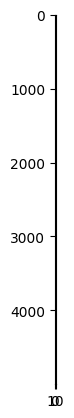

In [10]:
from matplotlib import pyplot as plt
plt.imshow(tensor)
# plt.show(cmap="gray")

In [21]:
import h5py
import pandas as pd
def print_attrs(name, obj):
    print(f"{name}:")
    for key, val in obj.attrs.items():
        print(f"  {key}: {val}")

with h5py.File('fake_0.hd5', 'r') as f:
   # Create a list to store the data
    data = []
    
    # Iterate through the datasets
    for key in f.keys():
        if isinstance(f[key], h5py.Dataset):
            # Get the dataset value
            value = f[key][()]
            # If it's a numpy array with one element, get that element
            if hasattr(value, 'shape') and value.shape == (1,):
                value = value[0]
            # Add to the data list
            data.append({'Variable': key, 'Value': value})

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.head(100)


,Variable,Value
0,mri_patient_orientation_cine_segmented_ao_dist,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
1,mri_patient_orientation_cine_segmented_lax_2ch,"[0.65304604904224, -0.7510222589136, 0.0974495..."
2,mri_patient_orientation_cine_segmented_lax_3ch,"[-0.0537418022987, 0.99179500603021, -0.115993..."
3,mri_patient_orientation_cine_segmented_lax_4ch,"[0.99972238532387, -0.020816255069, -0.0110379..."
4,mri_patient_orientation_cine_segmented_lax_inl...,"[0.73748129471062, -0.6751518453459, 0.0170682..."
...,...,...
95,mri_patient_orientation_cine_segmented_lax_inl...,"[0.99972238532387, -0.020816255069, -0.0110379..."
96,mri_patient_orientation_cine_segmented_lax_inl...,"[0.99972238532387, -0.020816255069, -0.0110379..."
97,mri_patient_orientation_cine_segmented_lax_inl...,"[0.99972238532387, -0.020816255069, -0.0110379..."
98,mri_patient_orientation_cine_segmented_lax_inl...,"[0.99972238532387, -0.020816255069, -0.0110379..."


In [28]:
def print_attrs(name, obj):
    print(f"{name}:")
    for key, val in obj.attrs.items():
        print(f"  {key}: {val}")

with h5py.File('fake_0.hd5', 'r') as f:
    # f.visititems(print_attrs)
    
    # Print dataset names
    for key in f.keys():
        print(f"Dataset: {key}")
        
    # Access specific datasets
    dataset = f['categorical']
    print(dataset[:10])  # Print first 10 elements

Dataset: categorical
Dataset: continuous
Dataset: dates
Dataset: mri_patient_orientation_cine_segmented_ao_dist
Dataset: mri_patient_orientation_cine_segmented_lax_2ch
Dataset: mri_patient_orientation_cine_segmented_lax_3ch
Dataset: mri_patient_orientation_cine_segmented_lax_4ch
Dataset: mri_patient_orientation_cine_segmented_lax_inlinevf_551
Dataset: mri_patient_orientation_cine_segmented_lax_inlinevf_552
Dataset: mri_patient_orientation_cine_segmented_lax_inlinevf_553
Dataset: mri_patient_orientation_cine_segmented_lax_inlinevf_554
Dataset: mri_patient_orientation_cine_segmented_lax_inlinevf_555
Dataset: mri_patient_orientation_cine_segmented_lax_inlinevf_556
Dataset: mri_patient_orientation_cine_segmented_lax_inlinevf_557
Dataset: mri_patient_orientation_cine_segmented_lax_inlinevf_558
Dataset: mri_patient_orientation_cine_segmented_lax_inlinevf_559
Dataset: mri_patient_orientation_cine_segmented_lax_inlinevf_560
Dataset: mri_patient_orientation_cine_segmented_lax_inlinevf_561
Datas

TypeError: Accessing a group is done with bytes or str, not <class 'slice'>

ValueError: Invalid group (or file) id (invalid group (or file) ID)

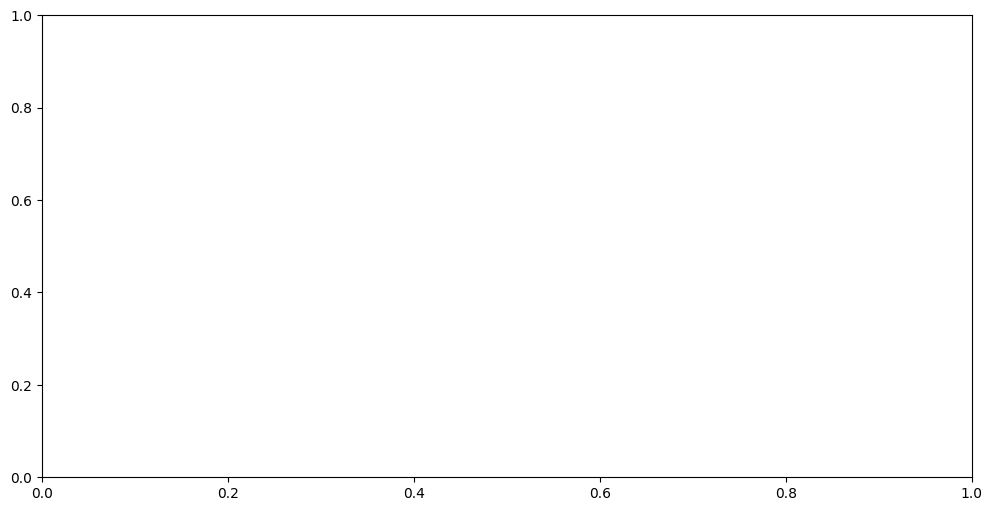

In [34]:
with h5py.File('fake_0.hd5', 'r') as f:
    ecg_data = f['ukb_ecg_rest']
    time_data = f['dates']  # Assuming time data is stored separately
ecg_data,time_data
plt.figure(figsize=(12, 6))
plt.plot(time_data, ecg_data)
plt.xlabel('Time (s)')